In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Dense

In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

### Weather Data set 

In [4]:
dir_path_dataset_1 = 'C:/Users/anand/Downloads/Weather report 2008 -2010.csv'


### Load Dataset

In [5]:
df_ALL = pd.read_csv('C:/Users/anand/Downloads/Weather report 2008 -2010.csv')


In [6]:
df_ALL.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71,22,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44,25,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38,30,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82,33,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Breif Exploratory Data Analysis

In [7]:
df_ALL.shape

(500, 23)

In [8]:
df_ALL.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Statistics summary

In [9]:
df_ALL.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,500.000000,500.00000,495.000000,0.0,0.0,494.000000,497.000000,497.000000,500.000000,500.000000,500.000000,500.000000,164.000000,176.000000,500.000000,500.000000
mean,11.113600,24.87640,1.508283,NaN,NaN,35.259109,8.376258,14.919517,67.006000,40.938000,1016.781600,1013.996600,6.103659,5.113636,15.920200,23.615800
std,6.091241,8.22335,5.040909,NaN,NaN,14.723884,7.072014,7.867704,18.291723,20.660878,6.859686,6.702245,2.575531,2.921572,6.466502,8.002743
min,-2.000000,8.20000,0.000000,NaN,NaN,11.000000,0.000000,0.000000,20.000000,7.000000,994.300000,993.000000,0.000000,1.000000,1.900000,7.300000
25%,6.500000,17.67500,0.000000,NaN,NaN,24.000000,4.000000,9.000000,51.000000,24.000000,1011.600000,1008.800000,4.000000,2.000000,10.575000,16.675000
50%,11.300000,25.30000,0.000000,NaN,NaN,33.000000,7.000000,13.000000,68.000000,38.000000,1016.650000,1013.750000,8.000000,6.000000,16.000000,24.100000
75%,15.600000,31.30000,0.400000,NaN,NaN,43.750000,11.000000,20.000000,82.000000,56.000000,1021.925000,1019.025000,8.000000,8.000000,20.825000,29.725000
max,28.300000,44.80000,66.000000,NaN,NaN,107.000000,37.000000,50.000000,99.000000,97.000000,1036.300000,1033.600000,8.000000,8.000000,34.500000,43.400000


In [10]:
### Filtering all other atributes

In [11]:
df = df_ALL.iloc[:,3:4]


In [12]:
df.head()

,MaxTemp
0,22.9
1,25.1
2,25.7
3,28.0
4,32.3


<AxesSubplot:>

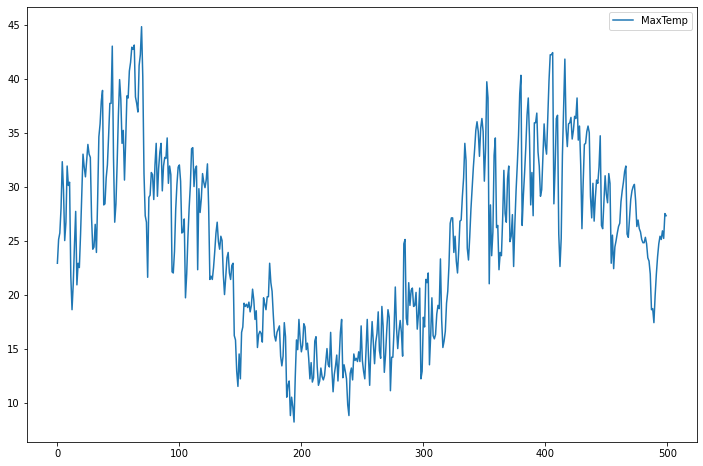

In [13]:
df.plot(figsize=(12,8))

In [14]:
length60=60

In [15]:
length60

60

###Time Series Dataste: Train / test Split 

In [16]:
len(df)

500

In [17]:
test_percent = 0.1

In [18]:
len(df)*test_percent

50.0

### Split-> Train /test

In [19]:
test_length= np.round(len(df)*test_percent)
test_length

50.0

In [20]:
split_index = int(len(df) - test_length)

split_index

450

In [21]:
data_train= df.iloc[: split_index]
data_test = df.iloc[split_index - length60 :]

In [22]:
data_train.head(5)

,MaxTemp
0,22.9
1,25.1
2,25.7
3,28.0
4,32.3


In [23]:
data_train.tail()

,MaxTemp
445,34.7
446,26.4
447,26.1
448,28.5
449,31.0


In [24]:
data_test.head(5)

,MaxTemp
390,27.3
391,35.9
392,35.9
393,36.8
394,33.2


In [25]:
data_test.tail()

,MaxTemp
495,25.1
496,25.9
497,25.2
498,27.5
499,27.3


### Normalize Data (scaling)

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(data_train)

MinMaxScaler()

In [28]:
normalized_train= scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training

In [29]:
batch_size32 = 32
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [30]:
len(normalized_train)

450

In [31]:
len(train_tsGenerator60)

13

In [32]:
X,Y = train_tsGenerator60[0]

### Build, Train and test Model

In [33]:
n_features = 1

In [34]:
## Define Model
model = Sequential()

# Add an LSTM Layer
# This Layer has 50 LSTM Cells
# Activation Function: relu
# MUST: return_sequences=True
#-----> Because of multiple LSTM layers: the layers are stacked
#-----> Outputs = inputs of the next LSTM layer
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(length60, n_features)))

## Dropout Layer
model.add(Dropout(0.1))

## Add 2nd LSTM Layer
# MUST: return_sequences=True
#----> Because of multiple LSTM layers: Layers are Stacked
#----> Outputs = inputs of the next LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))

## Dropout Layer
model.add(Dropout(0.1))

## Add 3rd LSTM Layer
model.add(LSTM(units=150, activation='relu'))

#Add a FC (fully-connected) layer for the final prediction
model.add(Dense(1))

##Procedure:
#Time Series Input---> LSTM --->Dropout --->LSTM --->Droput --->LSTM --->Dense --->Output

### Compile Model

In [35]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 150)           91200     
                                                                 
 dropout (Dropout)           (None, 60, 150)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            40200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               120600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 252,151
Trainable params: 252,151
Non-trai

### Train (fit) model Using fit_generator()

In [36]:
## Train the Model

model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100


C:\Users\anand\AppData\Local\Temp\ipykernel_4432\1790817069.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator60, epochs=100)


13/13 [==============================] - 5s 99ms/step - loss: 0.1183
Epoch 2/100
13/13 [==============================] - 1s 98ms/step - loss: 0.0582
Epoch 3/100
13/13 [==============================] - 1s 96ms/step - loss: 0.0284
Epoch 4/100
13/13 [==============================] - 1s 94ms/step - loss: 0.0212
Epoch 5/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0184
Epoch 6/100
13/13 [==============================] - 1s 99ms/step - loss: 0.0161
Epoch 7/100
13/13 [==============================] - 1s 113ms/step - loss: 0.0156
Epoch 8/100
13/13 [==============================] - 1s 108ms/step - loss: 0.0283
Epoch 9/100
13/13 [==============================] - 1s 107ms/step - loss: 0.0246
Epoch 10/100
13/13 [==============================] - 2s 141ms/step - loss: 0.0230
Epoch 11/100
13/13 [==============================] - 2s 134ms/step - loss: 0.0157
Epoch 12/100
13/13 [==============================] - 2s 129ms/step - loss: 0.0164
Epoch 13/100
13/13 [===========

13/13 [==============================] - 2s 128ms/step - loss: 0.0137


### Visulaize Model's PErformance after Training 

In [37]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

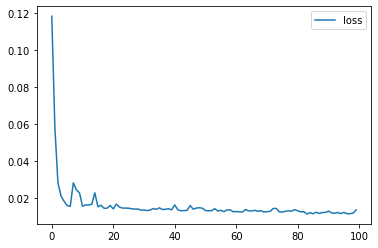

In [38]:
df_model_loss = pd.DataFrame(model.history.history)


df_model_loss.plot()

In [39]:
### Prediction for Testing : using Timeseries Genrator

In [40]:
batch_size1= 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

In [41]:
normalized_prediction=model.predict_generator (test_tsGenerator60)

C:\Users\anand\AppData\Local\Temp\ipykernel_4432\2645534869.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  normalized_prediction=model.predict_generator (test_tsGenerator60)


In [42]:
normalized_prediction

array([[0.6124534 ],
       [0.6113976 ],
       [0.60917795],
       [0.6123575 ],
       [0.61616373],
       [0.6030483 ],
       [0.58802617],
       [0.56539494],
       [0.54445714],
       [0.5270463 ],
       [0.51477844],
       [0.50819725],
       [0.50671464],
       [0.51367   ],
       [0.52829486],
       [0.5486558 ],
       [0.57291716],
       [0.59813565],
       [0.60673845],
       [0.6041025 ],
       [0.59875154],
       [0.5962387 ],
       [0.5975077 ],
       [0.6018205 ],
       [0.6078316 ],
       [0.6107184 ],
       [0.60624516],
       [0.5993498 ],
       [0.5898616 ],
       [0.5789829 ],
       [0.5663854 ],
       [0.5528409 ],
       [0.5394683 ],
       [0.5281274 ],
       [0.5174667 ],
       [0.5050142 ],
       [0.49130663],
       [0.4749768 ],
       [0.45144337],
       [0.42468846],
       [0.39565894],
       [0.37071067],
       [0.35373247],
       [0.3473912 ],
       [0.3525785 ],
       [0.3685427 ],
       [0.39150253],
       [0.419

In [43]:
len(normalized_prediction)

50

In [44]:
prediction = scaler.inverse_transform(normalized_prediction)

In [45]:
prediction_index = np.arange(166, 166+len(prediction), step=1)

df_prediction = pd.DataFrame(data=prediction,index=prediction_index, columns=['prediction'])

In [46]:
df_prediction

,prediction
166,30.615795
167,30.577154
168,30.495913
169,30.612286
170,30.751593
171,30.271568
172,29.721758
173,28.893456
174,28.127132
175,27.489895


### Visulaize Predictions

<AxesSubplot:>

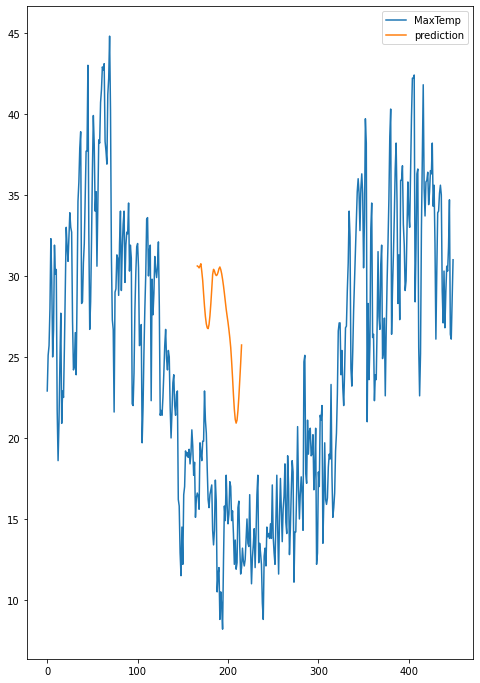

In [47]:
ax = data_train.plot()

df_prediction.plot(ax=ax, figsize=(8, 12))

In [48]:
full_scaler= MinMaxScaler()
normalized_full_data=full_scaler.fit_transform(df)

### Create Timeseries GEnerator for Forecasting

In [49]:
length60

60

In [50]:
forecast_tsGenerator = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

### Build Compile and Fit LTSM model for forecasting

In [51]:
model.fit_generator(forecast_tsGenerator, epochs=100)

Epoch 1/100
 1/13 [=>............................] - ETA: 1s - loss: 0.0168

C:\Users\anand\AppData\Local\Temp\ipykernel_4432\199224003.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(forecast_tsGenerator, epochs=100)


13/13 [==============================] - 2s 139ms/step - loss: 0.0118
Epoch 2/100
13/13 [==============================] - 2s 141ms/step - loss: 0.0118
Epoch 3/100
13/13 [==============================] - 2s 146ms/step - loss: 0.0124
Epoch 4/100
13/13 [==============================] - 2s 151ms/step - loss: 0.0117
Epoch 5/100
13/13 [==============================] - 2s 158ms/step - loss: 0.0113
Epoch 6/100
13/13 [==============================] - 2s 152ms/step - loss: 0.0114
Epoch 7/100
13/13 [==============================] - 2s 147ms/step - loss: 0.0112
Epoch 8/100
13/13 [==============================] - 2s 133ms/step - loss: 0.0116
Epoch 9/100
13/13 [==============================] - 2s 137ms/step - loss: 0.0122
Epoch 10/100
13/13 [==============================] - 2s 145ms/step - loss: 0.0111
Epoch 11/100
13/13 [==============================] - 2s 146ms/step - loss: 0.0121
Epoch 12/100
13/13 [==============================] - 2s 147ms/step - loss: 0.0121
Epoch 13/100
13/13 [=====

Epoch 100/100
13/13 [==============================] - 2s 161ms/step - loss: 0.0082


### Time Series Forecast Using LSTM Nueural Network 

In [52]:
periods = 50

# Selecting the last 60 timesteps from the training dataset
first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))
forecast = []
# Generating the forecasts for the next 50 days
for i in range(periods):
    # Make a prediction with the current batch
    current_pred = model.predict(current_batch)[0]
    # Append the prediction to the forecast list
    forecast.append(current_pred)
    # Create a new batch with the predicted value and the previous 59 values
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)


1/1 [==============================] - 0s 31ms/step


###  inverse to transform

In [53]:
MaxTemp = full_scaler.inverse_transform(forecast)
MaxTemp

array([[25.3388283 ],
       [25.1358173 ],
       [25.43443713],
       [26.1426632 ],
       [27.16530775],
       [28.29098814],
       [29.20873163],
       [29.61503941],
       [29.38483346],
       [28.70765382],
       [27.9834164 ],
       [27.56190772],
       [27.60450209],
       [28.08002982],
       [28.82583603],
       [29.59944365],
       [30.11198322],
       [30.12926966],
       [29.63090786],
       [28.88019539],
       [28.22888216],
       [27.93444105],
       [28.07445601],
       [28.56721565],
       [29.22601371],
       [29.80386392],
       [30.05108144],
       [29.83892765],
       [29.26801034],
       [28.61672329],
       [28.16177175],
       [28.06666795],
       [28.3357684 ],
       [28.85114832],
       [29.41924055],
       [29.81915426],
       [29.86286994],
       [29.51761228],
       [28.95511568],
       [28.43465934],
       [28.16245893],
       [28.22386028],
       [28.56993165],
       [29.05881907],
       [29.50632722],
       [29

In [54]:
### creating new timestamp index with pandas 

In [55]:
MaxTemp_index = np.arange(1382, 1432, step=1)


In [56]:
forecast_df= pd.DataFrame(data=MaxTemp, index=MaxTemp_index, columns=['forecast'])

In [57]:
forecast_df

,forecast
1382,25.338828
1383,25.135817
1384,25.434437
1385,26.142663
1386,27.165308
1387,28.290988
1388,29.208732
1389,29.615039
1390,29.384833
1391,28.707654


### Plot the Forecast

<AxesSubplot:>

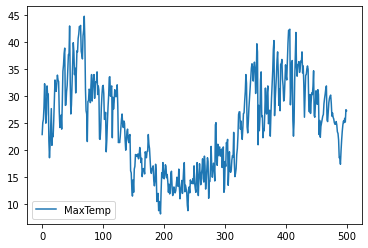

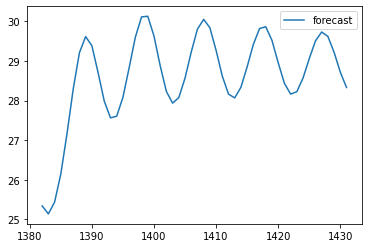

In [58]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

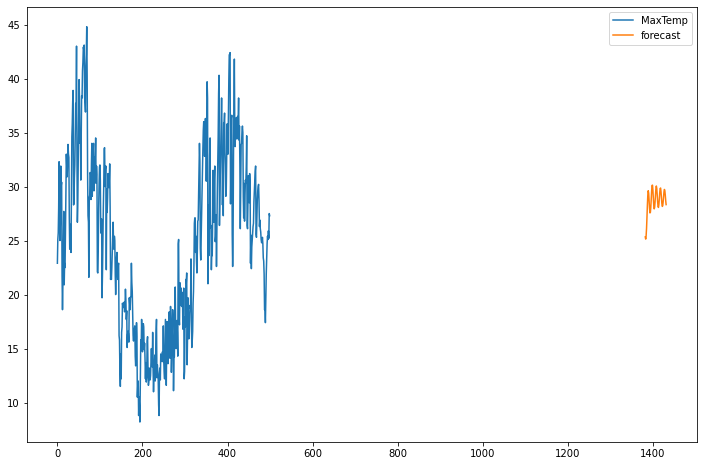

In [59]:
ax= df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [60]:
dir_path_dataset_2= 'C:/Users/anand/Downloads/Weather report 2010_Apr-Jun.csv'

In [61]:
df_ALL_forecast= pd.read_csv('C:/Users/anand/Downloads/Weather report 2010_Apr-Jun.csv')

In [62]:
df_ALL_forecast.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,23-04-2010,Albury,11.3,29.0,0.0,NaN,NaN,NNW,35,ESE,...,89,34,1020.5,1014.0,1.0,NaN,15.4,27.9,No,Yes
1,24-04-2010,Albury,15.4,19.8,3.6,NaN,NaN,NNW,46,NNE,...,95,86,1013.4,1008.7,8.0,8.0,17.1,18.6,Yes,Yes
2,25-04-2010,Albury,10.8,18.5,17.0,NaN,NaN,W,37,WSW,...,72,40,1016.2,1017.6,NaN,NaN,14.4,18.4,Yes,No
3,26-04-2010,Albury,5.1,17.9,0.0,NaN,NaN,SSE,15,E,...,78,49,1026.5,1023.0,NaN,NaN,10.4,16.9,No,No
4,27-04-2010,Albury,7.1,16.1,0.0,NaN,NaN,ENE,17,NaN,...,84,58,1020.9,1018.0,6.0,7.0,9.7,15.9,No,Yes


In [63]:
df_ALL_forecast = df_ALL_forecast.iloc[:, 3:4]


In [64]:
df_ALL_forecast

,MaxTemp
0,29.0
1,19.8
2,18.5
3,17.9
4,16.1
5,17.3
6,17.7
7,19.1
8,21.1
9,20.7


<AxesSubplot:>

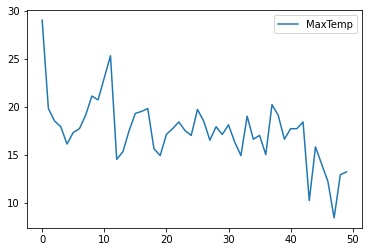

In [65]:
df_ALL_forecast.plot()

In [66]:
forecast_df['forecast'].values

array([25.3388283 , 25.1358173 , 25.43443713, 26.1426632 , 27.16530775,
       28.29098814, 29.20873163, 29.61503941, 29.38483346, 28.70765382,
       27.9834164 , 27.56190772, 27.60450209, 28.08002982, 28.82583603,
       29.59944365, 30.11198322, 30.12926966, 29.63090786, 28.88019539,
       28.22888216, 27.93444105, 28.07445601, 28.56721565, 29.22601371,
       29.80386392, 30.05108144, 29.83892765, 29.26801034, 28.61672329,
       28.16177175, 28.06666795, 28.3357684 , 28.85114832, 29.41924055,
       29.81915426, 29.86286994, 29.51761228, 28.95511568, 28.43465934,
       28.16245893, 28.22386028, 28.56993165, 29.05881907, 29.50632722,
       29.73093319, 29.61943519, 29.21782206, 28.71574075, 28.32954886])

In [67]:
df_ALL_forecast['forecast'] = forecast_df['forecast'].values

In [68]:
df_ALL_forecast

,MaxTemp,forecast
0,29.0,25.338828
1,19.8,25.135817
2,18.5,25.434437
3,17.9,26.142663
4,16.1,27.165308
5,17.3,28.290988
6,17.7,29.208732
7,19.1,29.615039
8,21.1,29.384833
9,20.7,28.707654


<AxesSubplot:>

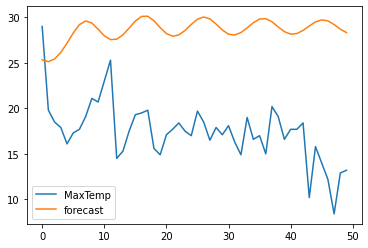

In [69]:
df_ALL_forecast.plot()